In [3]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/titanic.csv")
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [6]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [20]:
data["Survived"] = data["Survived"].map({0: "death", 1: "survival"})
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,death
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,survival
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,survival
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,survival
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,death


### 1. 간단한 시각화

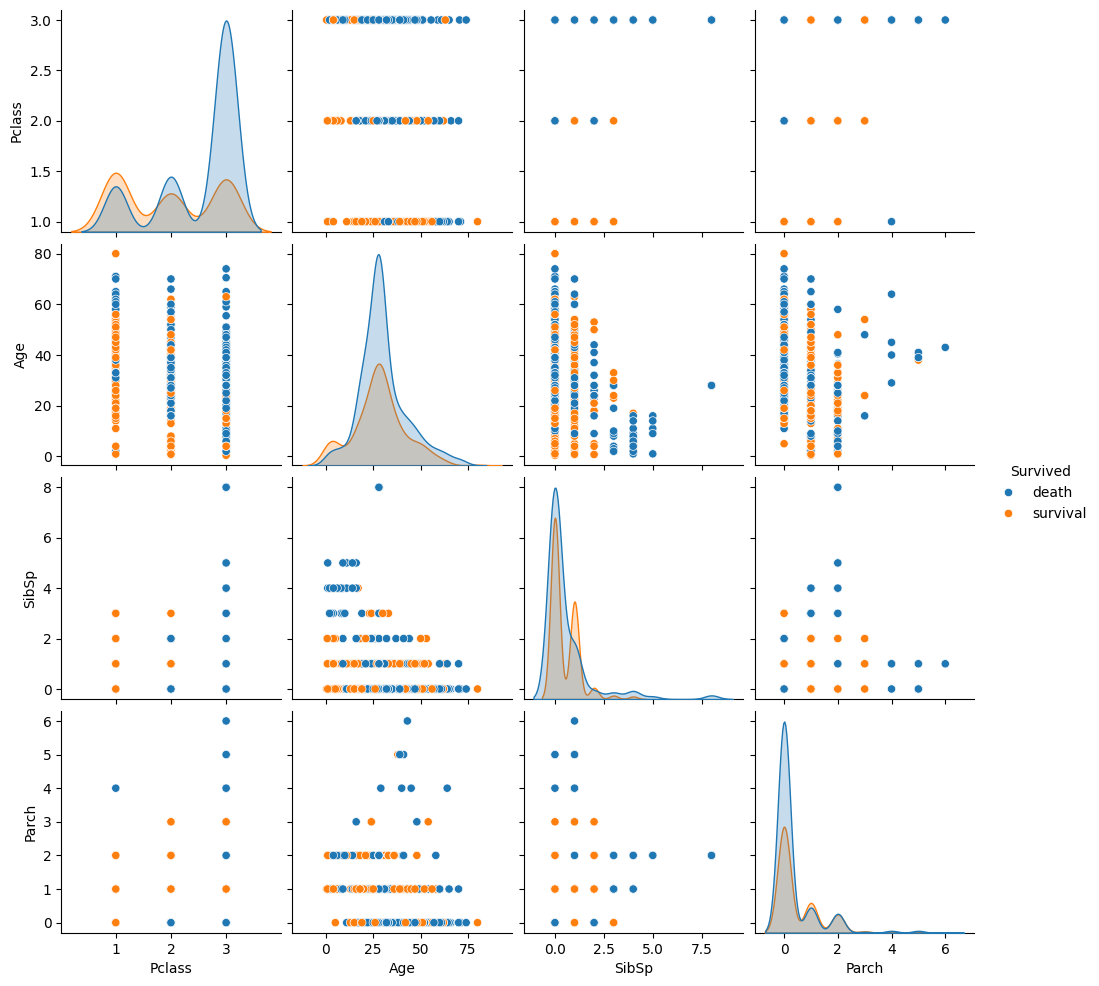

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue="Survived")

In [13]:
corr = data.corr(numeric_only = True)
corr

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.336512,0.081656,0.016824
Age,-0.336512,1.000000,-0.232543,-0.171485
SibSp,0.081656,-0.232543,1.000000,0.414542
Parch,0.016824,-0.171485,0.414542,1.000000


<Axes: >

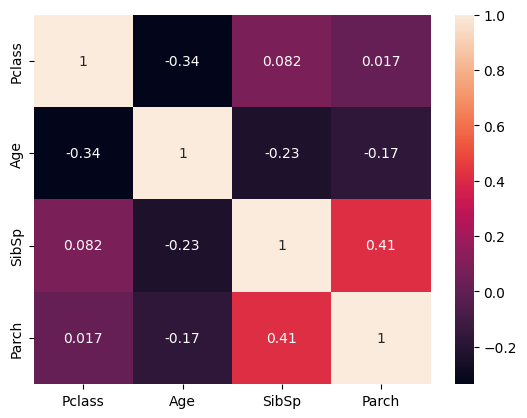

In [14]:
sns.heatmap(corr, annot = True)

### 2. ML용 데이터 전처리
1. 원핫인코딩: 독립변수의 범주형 변수를 변환하기 - 더미 변수로
2. 이름, 티켓번호 삭제
3. 독립변수/종속변수
4. 훈련세트/테스트세트
5. 표준화

In [21]:
# pd.get_dummies(data, columns=["Sex", "Embarked"])
pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,death,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,survival,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,survival,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,survival,0,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,death,1,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",27.0,0,0,211536,death,1,0,1
885,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,survival,0,0,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,death,0,0,1
887,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,survival,1,0,0
